<a href="https://colab.research.google.com/github/TheKnight909/T5/blob/main/Week5_Time_Series_Forecasting_Practical_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [3]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
100% 235k/235k [00:00<00:00, 404kB/s]
100% 235k/235k [00:00<00:00, 404kB/s]
Archive:  traffic-dataset.zip
  inflating: Traffic Data.csv        


In [4]:
import pandas as pd
df =pd.read_csv("/content/Traffic Data.csv",parse_dates=["date_time"])
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [5]:
df.dtypes

,0
traffic_volume,float64
temp,float64
rain_1h,float64
snow_1h,float64
clouds_all,int64
weather_main,object
weather_description,object
date_time,datetime64[ns]


In [6]:
df.shape

(20000, 8)

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [7]:
df = df.sort_values(by="date_time")
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
7745,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,2016-11-18 15:00:00
4628,4872.0,274.08,0.0,0.0,90,Fog,fog,2016-11-18 15:00:00
14496,4872.0,274.08,0.0,0.0,90,Mist,mist,2016-11-18 15:00:00
8867,5074.0,273.84,0.0,0.0,90,Fog,fog,2016-11-18 16:00:00
3867,5074.0,273.84,0.0,0.0,90,Mist,mist,2016-11-18 16:00:00


In [8]:
df = df.set_index('date_time')
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist
...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75,Clouds,broken clouds
2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90,Clouds,overcast clouds
2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm


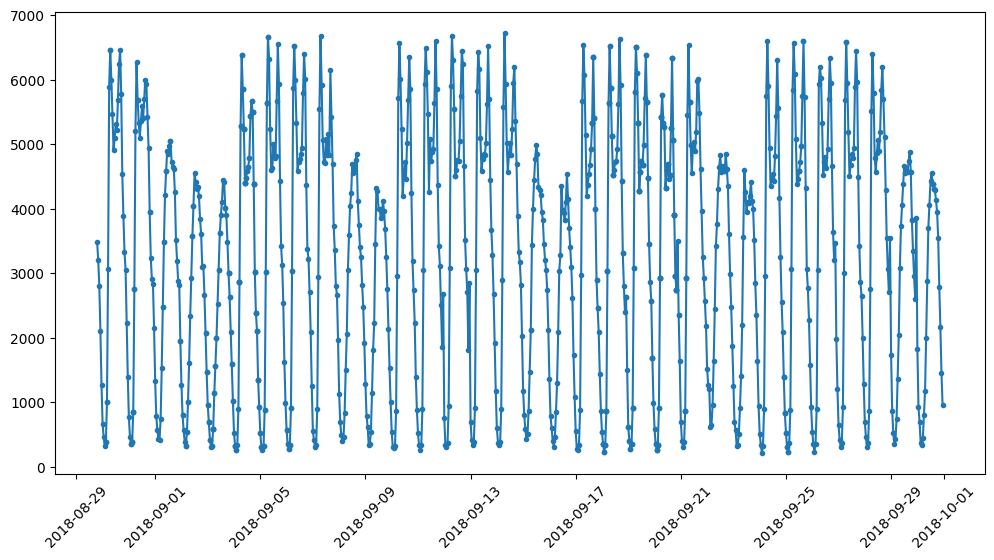

In [9]:
import matplotlib.pyplot as plt

df_specific = df.iloc[-1000:]
df_specific.dropna()
plt.figure(figsize=(12, 6))
plt.plot(df_specific.index, df_specific['traffic_volume'], marker='.')
plt.xticks(rotation=45)
plt.show()

<ipython-input-10-d32557fba157>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_specific['Rolling_Avg'] = df_specific['traffic_volume'].rolling(window=3).mean()


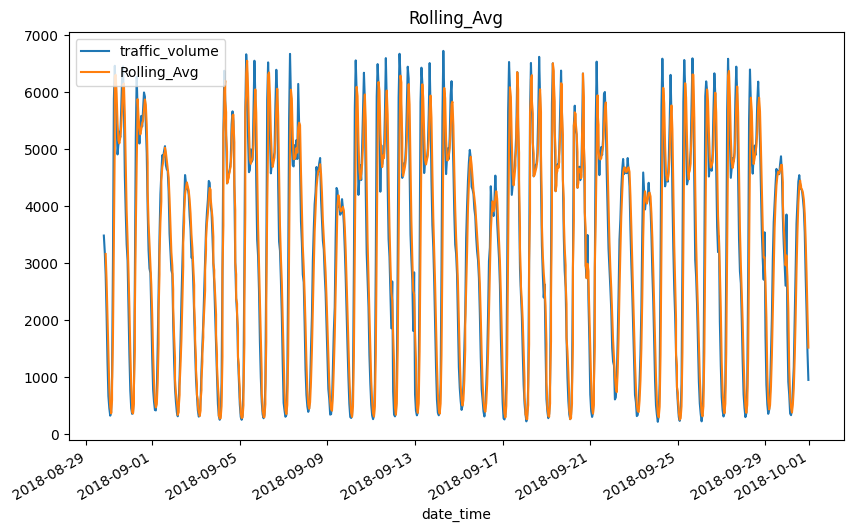

In [10]:
df_specific['Rolling_Avg'] = df_specific['traffic_volume'].rolling(window=3).mean()
df_specific[['traffic_volume', 'Rolling_Avg']].plot(figsize=(10, 6))
plt.title('Rolling_Avg')
plt.show()

In [11]:
print(df['weather_main'].value_counts())

weather_main
Clear           5614
Clouds          5234
Mist            2758
Rain            2244
Snow            1462
Drizzle          993
Haze             672
Thunderstorm     542
Fog              478
Smoke              3
Name: count, dtype: int64


In [12]:
print(df['weather_description'].value_counts().index.value_counts().sum())
df['snow_1h'].value_counts()

34


,count
snow_1h,
0.0,20000


In [13]:
# we remove (snow_1h) since all it's value is zero and we remove weather_description because it have 34 unique value so if i make onehot encoder it will create 34 coulmn and i already have (weather_main)
df.drop(columns=['snow_1h','weather_description'],inplace=True)
df.dtypes

,0
traffic_volume,float64
temp,float64
rain_1h,float64
clouds_all,int64
weather_main,object


In [14]:
df.head()

,traffic_volume,temp,rain_1h,clouds_all,weather_main
date_time,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,90,Snow
2016-11-18 15:00:00,4872.0,274.08,0.0,90,Fog
2016-11-18 15:00:00,4872.0,274.08,0.0,90,Mist
2016-11-18 16:00:00,5074.0,273.84,0.0,90,Fog
2016-11-18 16:00:00,5074.0,273.84,0.0,90,Mist


In [15]:
df.shape

(20000, 5)

In [16]:
df_copy=df.copy()
# how to put get_dummies for weather_main

df_copy = pd.concat([df_copy,pd.get_dummies(df['weather_main'],drop_first=True)],axis=1)
df_copy.drop(columns=['weather_main'],inplace=True)
boll=df_copy.select_dtypes(include=['bool']).columns
df_copy[boll]=df_copy[boll].astype(int)
df_copy1= df_copy.resample('M').mean() # so we can have the mean for each month
df_copy1.head()

,traffic_volume,temp,rain_1h,clouds_all,Clouds,Drizzle,Fog,Haze,Mist,Rain,Smoke,Snow,Thunderstorm
date_time,,,,,,,,,,,,,
2016-11-30,2704.857143,274.637456,0.0,72.440313,0.099804,0.111546,0.072407,0.009785,0.264188,0.183953,0.0,0.148728,0.007828
2016-12-31,2995.324411,266.961365,0.0,62.191444,0.182888,0.034225,0.010695,0.050267,0.163636,0.038503,0.0,0.305882,0.001070
2017-01-31,3018.398049,267.973546,0.0,59.549708,0.195906,0.046784,0.056530,0.088694,0.246589,0.036062,0.0,0.146199,0.000000
2017-02-28,3386.042017,272.000710,0.0,36.428571,0.336134,0.022409,0.016807,0.021008,0.060224,0.033613,0.0,0.072829,0.000000
2017-03-31,3414.931792,273.882821,0.0,52.494798,0.312139,0.075145,0.005780,0.018497,0.099422,0.079769,0.0,0.070520,0.005780


In [17]:
print(df_copy.shape)
df_copy.head()

(20000, 13)


,traffic_volume,temp,rain_1h,clouds_all,Clouds,Drizzle,Fog,Haze,Mist,Rain,Smoke,Snow,Thunderstorm
date_time,,,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,90,0,0,0,0,0,0,0,1,0
2016-11-18 15:00:00,4872.0,274.08,0.0,90,0,0,1,0,0,0,0,0,0
2016-11-18 15:00:00,4872.0,274.08,0.0,90,0,0,0,0,1,0,0,0,0
2016-11-18 16:00:00,5074.0,273.84,0.0,90,0,0,1,0,0,0,0,0,0
2016-11-18 16:00:00,5074.0,273.84,0.0,90,0,0,0,0,1,0,0,0,0


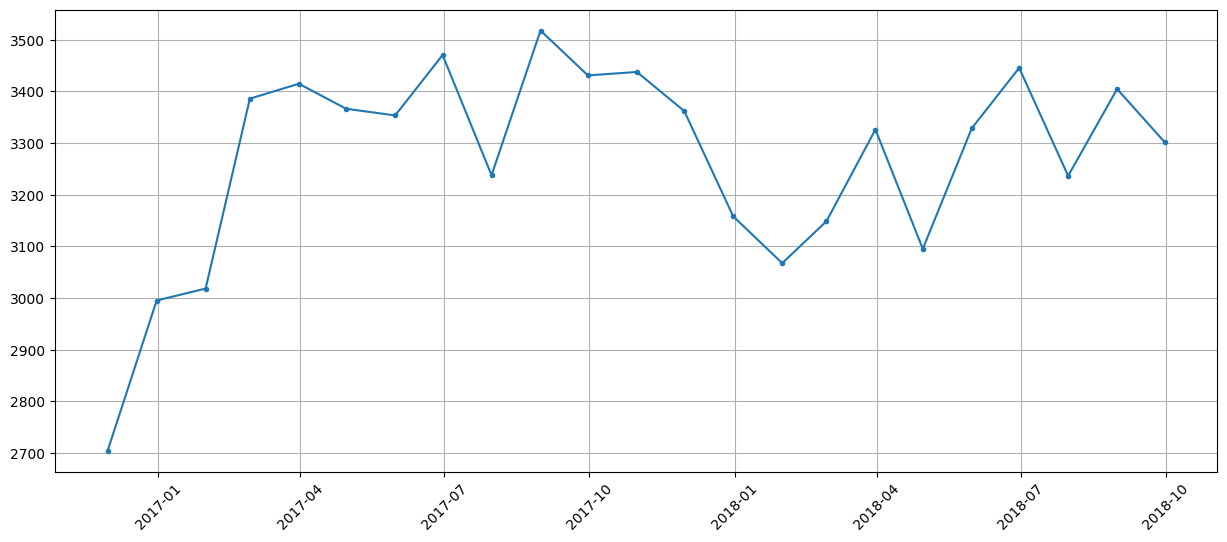

In [18]:
plt.figure(figsize=(15,6))
plt.plot(df_copy1.index,df_copy1['traffic_volume'], marker='.')
plt.xticks(rotation=45)
plt.grid(True)

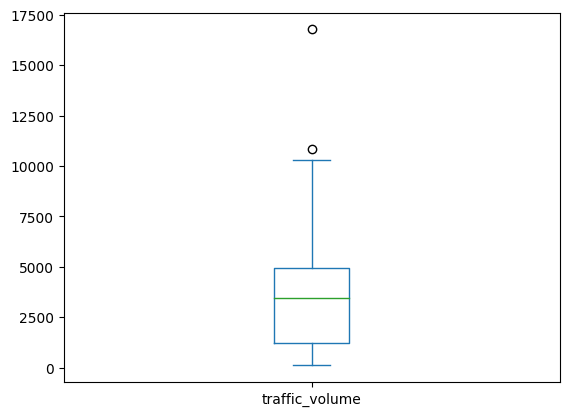

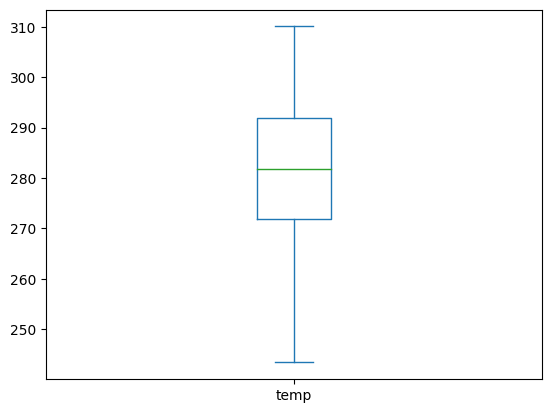

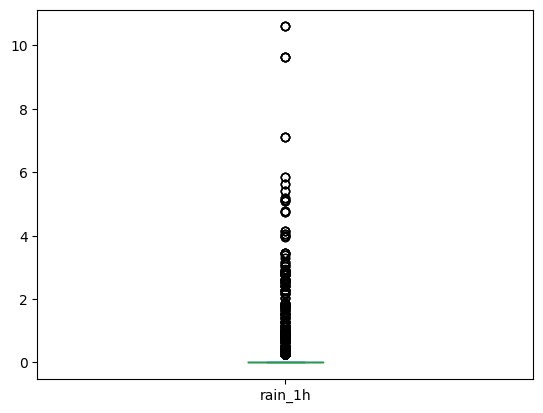

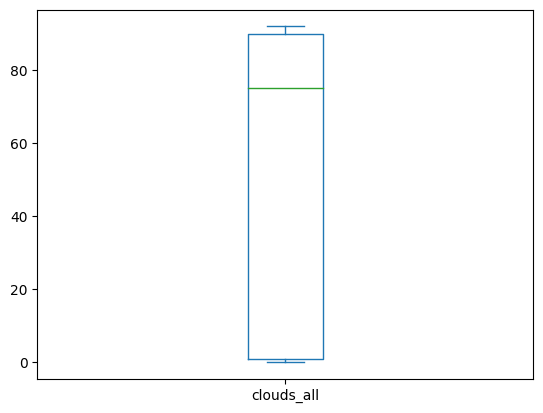

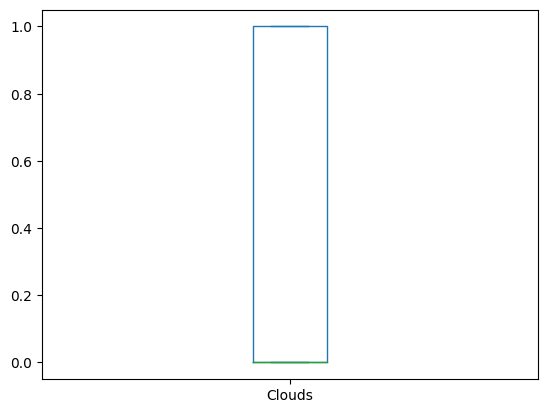

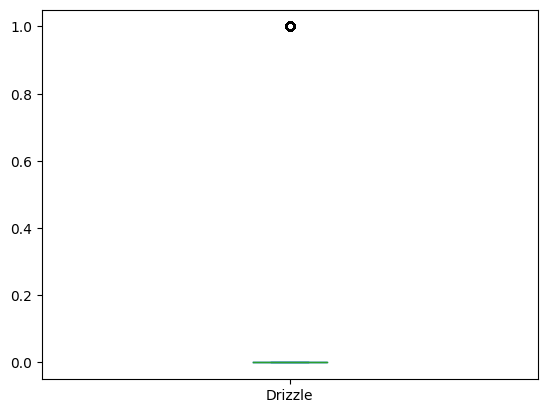

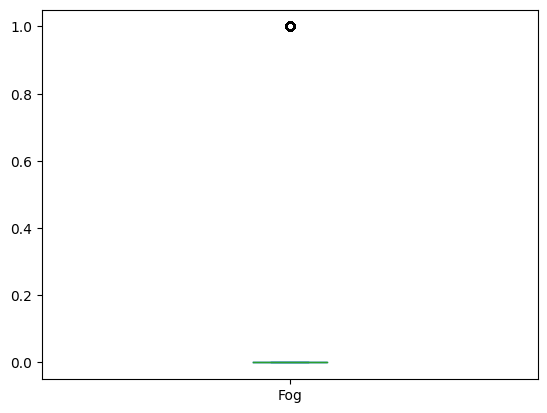

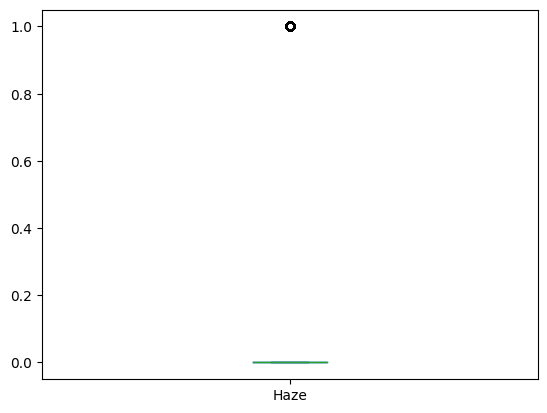

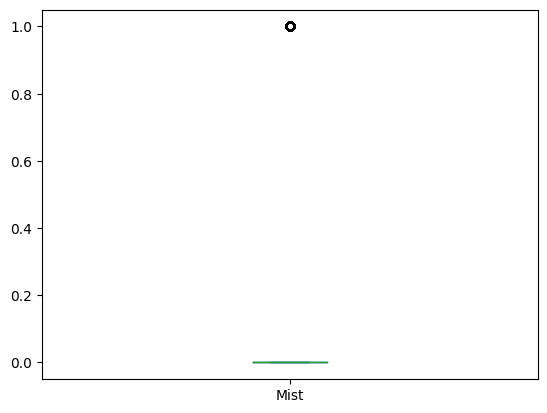

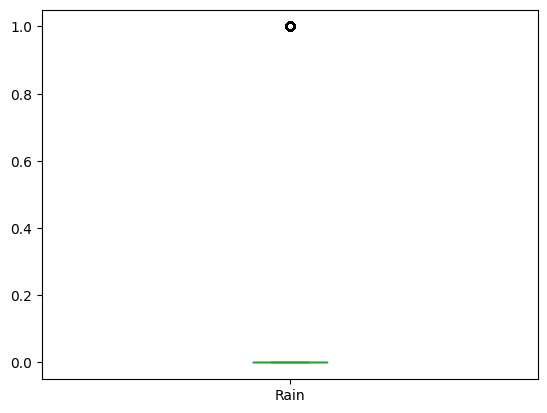

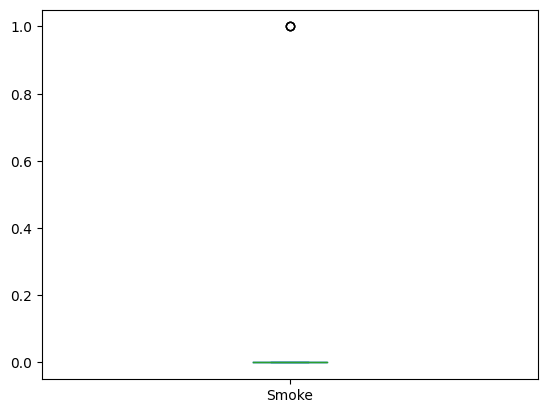

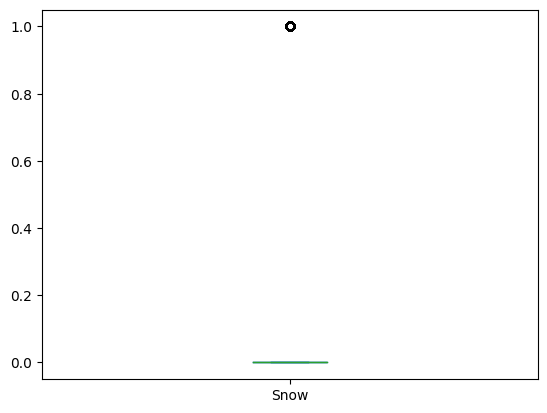

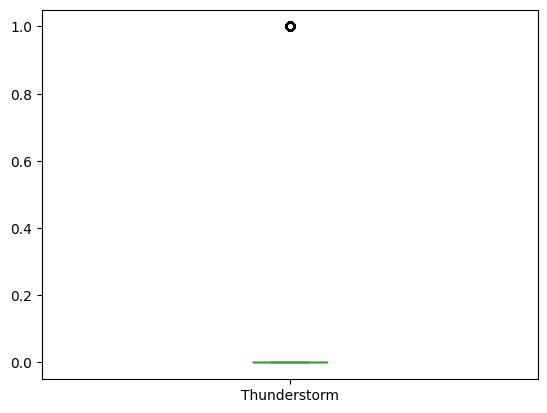

In [19]:
for i in df_copy.columns:
    df_copy[i].plot(kind='box')
    plt.show()


## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [20]:
df_copy.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
clouds_all,0
Clouds,0
Drizzle,0
Fog,0
Haze,0
Mist,0
Rain,0


In [21]:
df_copy.dropna(inplace=True)

In [22]:
df_copy.duplicated().sum()

18

In [23]:
df_copy.drop_duplicates(inplace=True)

In [24]:
lags = []
for i in range(0, 5):
    df_copy[f'prev_traffic_volume{i}'] = df_copy['traffic_volume'].shift(i)
    lags.append(f'prev_traffic_volume{i}')
df_copy.head()

,traffic_volume,temp,rain_1h,clouds_all,Clouds,Drizzle,Fog,Haze,Mist,Rain,Smoke,Snow,Thunderstorm,prev_traffic_volume0,prev_traffic_volume1,prev_traffic_volume2,prev_traffic_volume3,prev_traffic_volume4
date_time,,,,,,,,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,90,0,0,0,0,0,0,0,1,0,4872.0,NaN,NaN,NaN,NaN
2016-11-18 15:00:00,4872.0,274.08,0.0,90,0,0,1,0,0,0,0,0,0,4872.0,4872.0,NaN,NaN,NaN
2016-11-18 15:00:00,4872.0,274.08,0.0,90,0,0,0,0,1,0,0,0,0,4872.0,4872.0,4872.0,NaN,NaN
2016-11-18 16:00:00,5074.0,273.84,0.0,90,0,0,1,0,0,0,0,0,0,5074.0,4872.0,4872.0,4872.0,NaN
2016-11-18 16:00:00,5074.0,273.84,0.0,90,0,0,0,0,1,0,0,0,0,5074.0,5074.0,4872.0,4872.0,4872.0


In [25]:
df_copy.dropna(inplace=True)
df_copy.head()

,traffic_volume,temp,rain_1h,clouds_all,Clouds,Drizzle,Fog,Haze,Mist,Rain,Smoke,Snow,Thunderstorm,prev_traffic_volume0,prev_traffic_volume1,prev_traffic_volume2,prev_traffic_volume3,prev_traffic_volume4
date_time,,,,,,,,,,,,,,,,,,
2016-11-18 16:00:00,5074.0,273.84,0.0,90,0,0,0,0,1,0,0,0,0,5074.0,5074.0,4872.0,4872.0,4872.0
2016-11-18 16:00:00,5074.0,273.84,0.0,90,0,0,0,0,0,0,0,1,0,5074.0,5074.0,5074.0,4872.0,4872.0
2016-11-18 17:00:00,4328.0,273.62,0.0,90,0,0,0,0,0,0,0,1,0,4328.0,5074.0,5074.0,5074.0,4872.0
2016-11-18 17:00:00,4328.0,273.62,0.0,90,0,0,0,0,1,0,0,0,0,4328.0,4328.0,5074.0,5074.0,5074.0
2016-11-18 17:00:00,4328.0,273.62,0.0,90,0,0,1,0,0,0,0,0,0,4328.0,4328.0,4328.0,5074.0,5074.0


In [26]:
df_copy.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
clouds_all,0
Clouds,0
Drizzle,0
Fog,0
Haze,0
Mist,0
Rain,0


## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [27]:
df_copy['Day_of_the_week']= df_copy.index.day_of_week
df_copy['Month'] = df_copy.index.month
df_copy['Day_of_the_year'] = df_copy.index.day_of_year

df_copy['Difference_between_traffic_volume']= df_copy['traffic_volume'].diff()
df_copy.dropna(inplace=True)
df_copy.head()

,traffic_volume,temp,rain_1h,clouds_all,Clouds,Drizzle,Fog,Haze,Mist,Rain,...,Thunderstorm,prev_traffic_volume0,prev_traffic_volume1,prev_traffic_volume2,prev_traffic_volume3,prev_traffic_volume4,Day_of_the_week,Month,Day_of_the_year,Difference_between_traffic_volume
date_time,,,,,,,,,,,,,,,,,,,,,
2016-11-18 16:00:00,5074.0,273.84,0.0,90,0,0,0,0,0,0,...,0,5074.0,5074.0,5074.0,4872.0,4872.0,4,11,323,0.0
2016-11-18 17:00:00,4328.0,273.62,0.0,90,0,0,0,0,0,0,...,0,4328.0,5074.0,5074.0,5074.0,4872.0,4,11,323,-746.0
2016-11-18 17:00:00,4328.0,273.62,0.0,90,0,0,0,0,1,0,...,0,4328.0,4328.0,5074.0,5074.0,5074.0,4,11,323,0.0
2016-11-18 17:00:00,4328.0,273.62,0.0,90,0,0,1,0,0,0,...,0,4328.0,4328.0,4328.0,5074.0,5074.0,4,11,323,0.0
2016-11-18 18:00:00,3486.0,273.59,0.0,90,0,0,0,0,0,0,...,0,3486.0,4328.0,4328.0,4328.0,5074.0,4,11,323,-842.0


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [28]:
print(df_copy.shape)
df_copy.dtypes

(19957, 22)


,0
traffic_volume,float64
temp,float64
rain_1h,float64
clouds_all,int64
Clouds,int64
Drizzle,int64
Fog,int64
Haze,int64
Mist,int64
Rain,int64


In [29]:
from sklearn.model_selection import train_test_split

X = df_copy.drop(columns=['traffic_volume'])
y = df_copy['traffic_volume']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0, shuffle=False)

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [64]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)
y_train = SS.fit_transform(y_train.values.reshape(-1, 1))
y_test = SS.transform(y_test.values.reshape(-1, 1))

# MMScaler = MinMaxScaler()
# X_train = MMScaler.fit_transform(X_train)
# X_test = MMScaler.transform(X_test)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [65]:
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Dropout, Input

keras.utils.set_random_seed(0)

In [66]:
model_rnn = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    SimpleRNN(32, return_sequences=True, recurrent_dropout=0.15),
    SimpleRNN(64, return_sequences=True, recurrent_dropout=0.15),
    Dropout(0.15),
    SimpleRNN(128),
    Dense(1),
])

model_rnn.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_12 (SimpleRNN)            │ (None, 21, 32)              │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_13 (SimpleRNN)            │ (None, 21, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 21, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_14 (SimpleRNN)            │ (None, 128)                 │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,129 (125.50 KB)

 Trainable params: 32,129 (125.50 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
model_lstm = keras.models.Sequential([
    Input(shape=(X_train.shape[1], 1)),
    LSTM(16, return_sequences=True, recurrent_dropout=0.15),
    LSTM(32, return_sequences=True, recurrent_dropout=0.15),
    Dropout(0.10),
    LSTM(64),
    Dense(1),
])

model_lstm.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 21, 16)              │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 21, 32)              │           6,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 21, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,321 (126.25 KB)

 Trainable params: 32,321 (126.25 KB)

 Non-trainable params: 0 (0.00 B)

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [68]:
model_rnn.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',patience=10, restore_best_weights=True)

rnn_history=model_rnn.fit(X_train,y_train,epochs=20,validation_split=0.2,batch_size=128, shuffle=False, callbacks=early_stopping)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 0.3181 - mean_squared_error: 0.3181 - val_loss: 0.1785 - val_mean_squared_error: 0.1785
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0859 - mean_squared_error: 0.0859 - val_loss: 0.1215 - val_mean_squared_error: 0.1215
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0663 - mean_squared_error: 0.0663 - val_loss: 0.0814 - val_mean_squared_error: 0.0814
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0706 - mean_squared_error: 0.0706 - val_loss: 0.0586 - val_mean_squared_error: 0.0586
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0497 - mean_squared_error: 0.0497 - val_loss: 0.0913 - val_mean_squared_error: 0.0913
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0637 - mean_squared_error: 0.0637 - val_loss: 0.0543 - val_mean_squared_error: 0.0543
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0393 - mean_squared_error: 0.0393 - val_loss: 0

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [69]:
y_pred_rnn = model_rnn.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

MAE: 0.19038848901748665, MSE: 0.048104839686636834, RMSE: 0.21932815525289232


<Axes: >

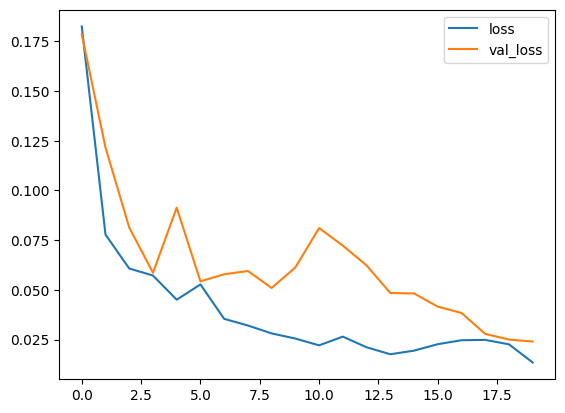

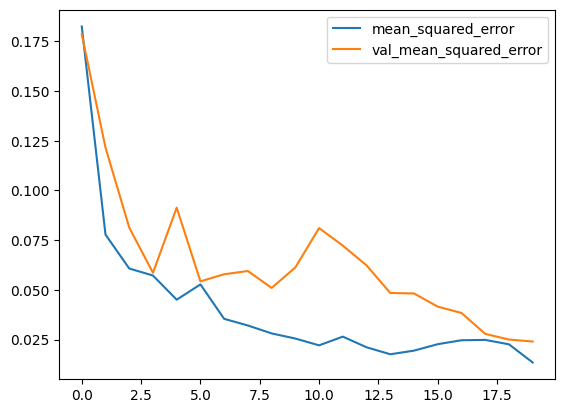

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

rnn_mae = mean_absolute_error(y_test, y_pred_rnn)
rnn_mse = mean_squared_error(y_test, y_pred_rnn)
rnn_rmse = np.sqrt(rnn_mse)
print(f'MAE: {rnn_mae}, MSE: {rnn_mse}, RMSE: {rnn_rmse}')

pd.DataFrame(rnn_history.history)[['loss','val_loss']].plot()
pd.DataFrame(rnn_history.history)[['mean_squared_error','val_mean_squared_error']].plot()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [71]:
model_lstm.compile(loss='mae',optimizer='adam',metrics=['mean_squared_error'])
LSTM_history = model_lstm.fit(X_train, y_train,epochs=20,validation_split=0.2, batch_size=128, shuffle=False, callbacks=early_stopping)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - loss: 0.5670 - mean_squared_error: 0.5120 - val_loss: 0.4425 - val_mean_squared_error: 0.3525
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - loss: 0.3912 - mean_squared_error: 0.2843 - val_loss: 0.3728 - val_mean_squared_error: 0.2885
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - loss: 0.3382 - mean_squared_error: 0.2315 - val_loss: 0.3983 - val_mean_squared_error: 0.3208
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - loss: 0.3439 - mean_squared_error: 0.2498 - val_loss: 0.3752 - val_mean_squared_error: 0.2790
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - loss: 0.3215 - mean_squared_error: 0.2168 - val_loss: 0.3579 - val_mean_squared_error: 0.2493
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 0.2943 - mean_squared_error: 0.1743 - val_loss: 0.2703 - val_mean_squared_error: 0.1424
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - loss: 0.2129 - mean_squared_error: 0.0856 - va

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [72]:
y_pred_lstm = model_lstm.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

MAE: 0.4037080012107803, MSE: 0.29705923379222504, RMSE: 0.5450314062439201


<Axes: >

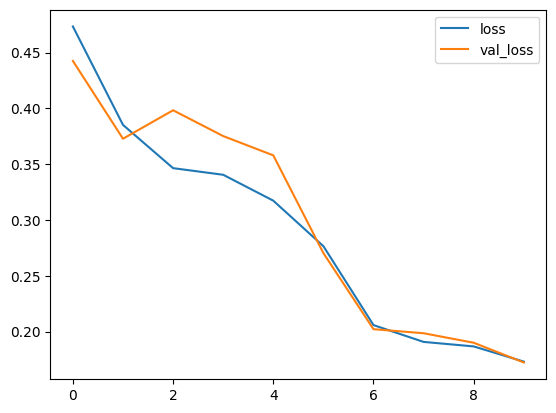

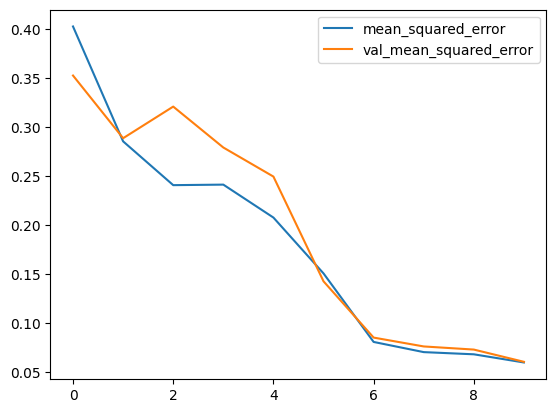

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

lstm_mae = mean_absolute_error(y_test, y_pred_lstm)
lstm_mse = mean_squared_error(y_test, y_pred_lstm)
lstm_rmse = np.sqrt(lstm_mse)
print(f'MAE: {lstm_mae}, MSE: {lstm_mse}, RMSE: {lstm_rmse}')

pd.DataFrame(LSTM_history.history)[['loss','val_loss']].plot()
pd.DataFrame(LSTM_history.history)[['mean_squared_error','val_mean_squared_error']].plot()

## Project Questions:

1. **Data Preprocessing**: Explain How you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

1.Data Preprocessing: I drop 2 column



1.   (snow_1h) since all it's value is zero  
2.   (weather_description) because it have 34 unique value so if i make onehot encoder it will create 34 coulmn and i already have (weather_main)

And i make onehotencoder for (weather_main) since it is the only categorical having 9 unique value.

And also i normalize all the numeric futures with min max scaller

---

2.Feature Engineering: i split the the data_time into Month, day_of_week, day_of_year, and also i create 5 Lags from the coulumn (traffic_volume) by using shifting approach and then name it prev_traffic_volume_i



---

3.Model Architecture: for the rnn_model & lstm_model i create 3 rnn layer with diffrint number of neurons and use the dropout so i can avoid any overfitting and i use 1 neuron for the output layers.



---

4.Training Process: i try diffirent hypermetter and i hot diffirint result for each of them And i stick with 10 epochs since the trainning take alots of time



---

5.Loss Function and Metrics: for the loss function i try the MSE, MAE, RMSE so i can see the result for diffirent metrics.



---

6.Model Tuning (If Done): i didn't go deeo with it.



---


7.Overfitting and Underfitting: there is no any Overfitting nor  Underfitting.



---



8.Future Improvements: maybe if i remove all the features except for the (traffic_volume) and the lags it would perform better or if use diffirent algorithm such as ARIMS.  
